# #
NLP Sentiment and classification analysis:

Business Objective: Extracting customer reviews on a product ( around 1000 reviews), doing sentiment analysis, and then building a classification model to predict the sentiment. 

Data Set Details:
The dataset should be scraped/extracted form ecommerce websites like amazon etc. 
Preferably amazon and focus only on extracting customer reviews , rest are not required

product:Apple iPhone 15 (128 GB) - Black

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import pandas as pd

In [2]:
from sklearn import (
    decomposition,
    ensemble,
    feature_extraction,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [783]:
data = pd.read_csv("/Users/sandip/Downloads/APPLE_iPhone_SE.csv")

# EDA

In [784]:
data.shape

(9713, 3)

In [785]:
data.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [786]:
#data.drop(columns=['title'],inplace=True)

In [787]:
data.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [788]:
data.isnull().sum()

Ratings    0
Comment    0
Reviews    0
dtype: int64

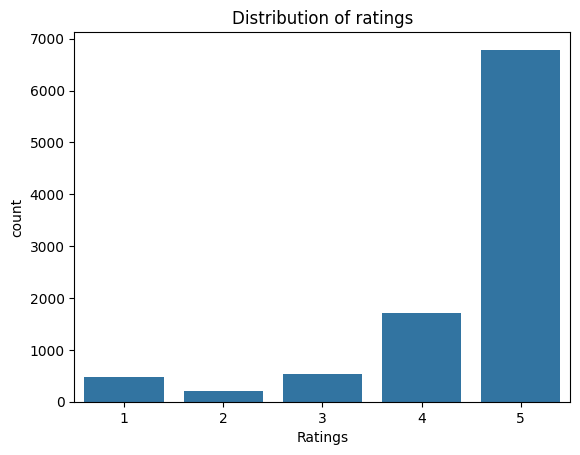

In [789]:
sns.countplot(x='Ratings',data=data)
plt.title('Distribution of ratings')
plt.show()

In [790]:
 data['review_length']=data['Reviews'].apply(len)

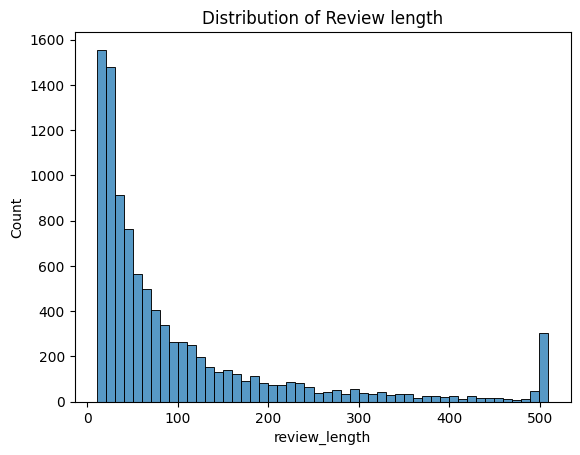

In [791]:
sns.histplot(data['review_length'],bins=50)
plt.title('Distribution of Review length')
plt.show()

# Sentiment Analysis

In [792]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sandip/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/sandip/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sandip/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [793]:
def clean_text(text):
    text=text.lower()
    text=[word.str]

In [794]:
def clean_text(text):
    
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text) 

In [795]:
data["Reviews"] = data["Reviews"].apply(lambda x: clean_text(x))

In [796]:
 data

,Ratings,Comment,Reviews,review_length
0,5,Super!,great camera pic videos battery life good far ...,506
1,5,Must buy!,great device let tell superb build quality gre...,270
2,5,Great product,love old size i.e inch type definitely go noth...,148
3,5,Simply awesome,iphone se best phone ever get beautifully desi...,503
4,5,Classy product,second iphone iphone i’ve long time android us...,507
...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread,29
9709,5,Classy product,superb phone iphone feel se thin pocket friend...,104
9710,5,Awesome,niceread,18
9711,5,Super!,love good product read,44


In [797]:
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["Reviews"].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)
'''
sid = SentimentIntensityAnalyzer()
data["sentiments_title"] = data["Title"].apply(lambda x: sid.polarity_scores(x))
data = pd.concat([data.drop(['sentiments_title'], axis=1), data['sentiments_title'].apply(pd.Series)], axis=1)
'''
data

,Ratings,Comment,Reviews,review_length,neg,neu,pos,compound
0,5,Super!,great camera pic videos battery life good far ...,506,0.000,0.765,0.235,0.9246
1,5,Must buy!,great device let tell superb build quality gre...,270,0.000,0.388,0.612,0.9868
2,5,Great product,love old size i.e inch type definitely go noth...,148,0.235,0.453,0.312,0.4055
3,5,Simply awesome,iphone se best phone ever get beautifully desi...,503,0.087,0.510,0.403,0.9686
4,5,Classy product,second iphone iphone i’ve long time android us...,507,0.076,0.655,0.269,0.9041
...,...,...,...,...,...,...,...,...
9708,5,Terrific purchase,absolutely brilliantread,29,0.000,1.000,0.000,0.0000
9709,5,Classy product,superb phone iphone feel se thin pocket friend...,104,0.000,0.490,0.510,0.8074
9710,5,Awesome,niceread,18,0.000,1.000,0.000,0.0000
9711,5,Super!,love good product read,44,0.000,0.220,0.780,0.7964


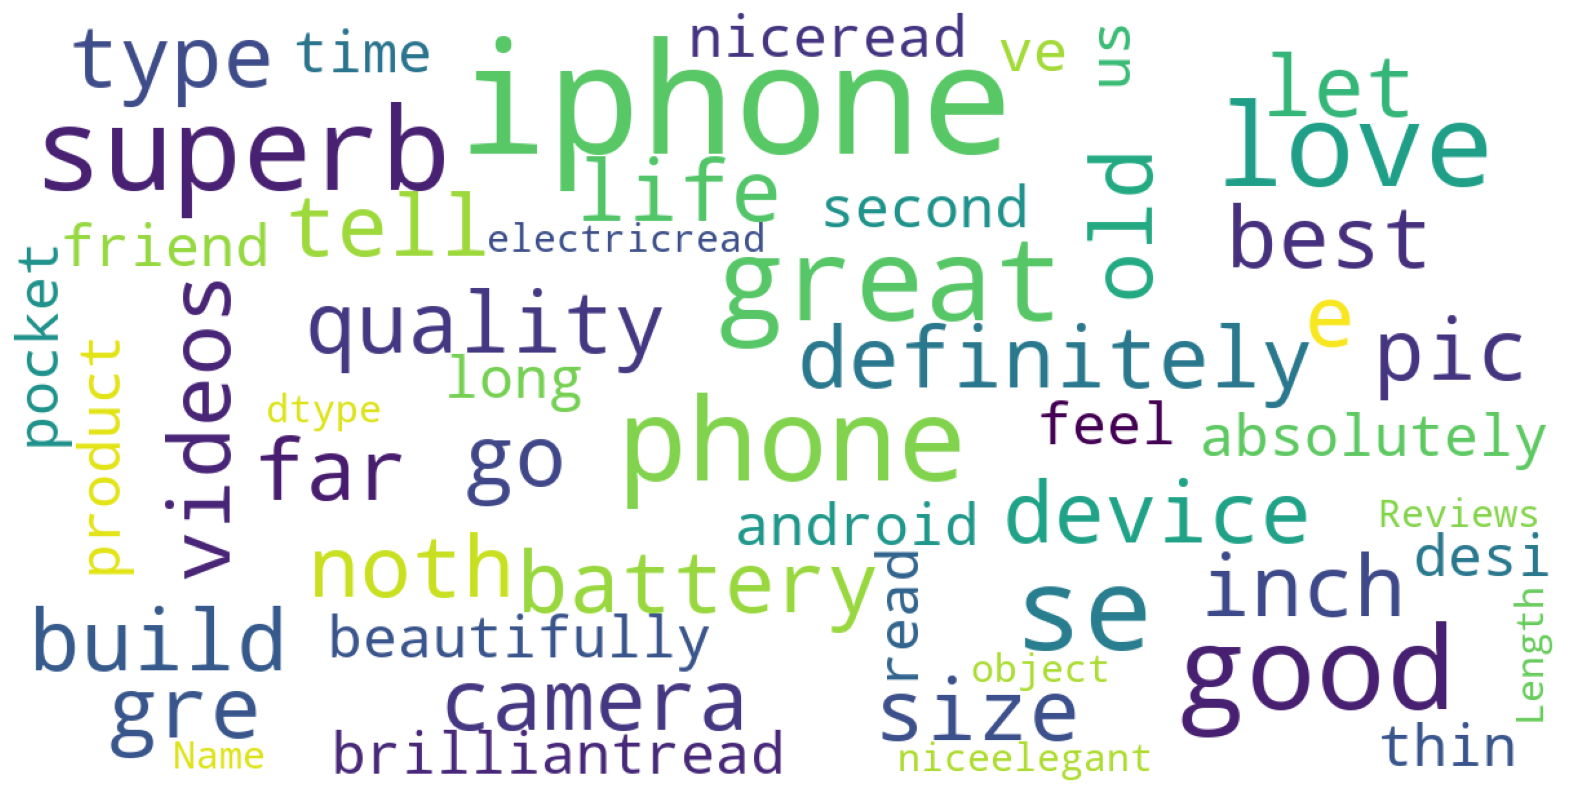

In [798]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(data["Reviews"])

In [799]:
data.head(2)

,Ratings,Comment,Reviews,review_length,neg,neu,pos,compound
0,5,Super!,great camera pic videos battery life good far ...,506,0.0,0.765,0.235,0.9246
1,5,Must buy!,great device let tell superb build quality gre...,270,0.0,0.388,0.612,0.9868


In [800]:
# Display the first few rows to understand the data structure
print(data.head())

# Check for missing values in the 'review_text' column
print(data['Reviews'].isnull().sum())

   Ratings         Comment                                            Reviews  \
0        5          Super!  great camera pic videos battery life good far ...   
1        5       Must buy!  great device let tell superb build quality gre...   
2        5   Great product  love old size i.e inch type definitely go noth...   
3        5  Simply awesome  iphone se best phone ever get beautifully desi...   
4        5  Classy product  second iphone iphone i’ve long time android us...   

   review_length    neg    neu    pos  compound  
0            506  0.000  0.765  0.235    0.9246  
1            270  0.000  0.388  0.612    0.9868  
2            148  0.235  0.453  0.312    0.4055  
3            503  0.087  0.510  0.403    0.9686  
4            507  0.076  0.655  0.269    0.9041  
0


In [801]:
# Check for any missing reviews and drop them if necessary
data = data.dropna(subset=['Reviews'])

# Optionally, lowercasing the review text
data['cleaned_review_text'] = data['Reviews'].str.lower()

In [802]:
from textblob import TextBlob

# Function to get the sentiment of a review
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [803]:
# Apply the sentiment function to the review text
data['sentiment_score'] = data['cleaned_review_text'].apply(analyze_sentiment)

# Categorize the sentiment based on the polarity score
data['sentiment_category'] = data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

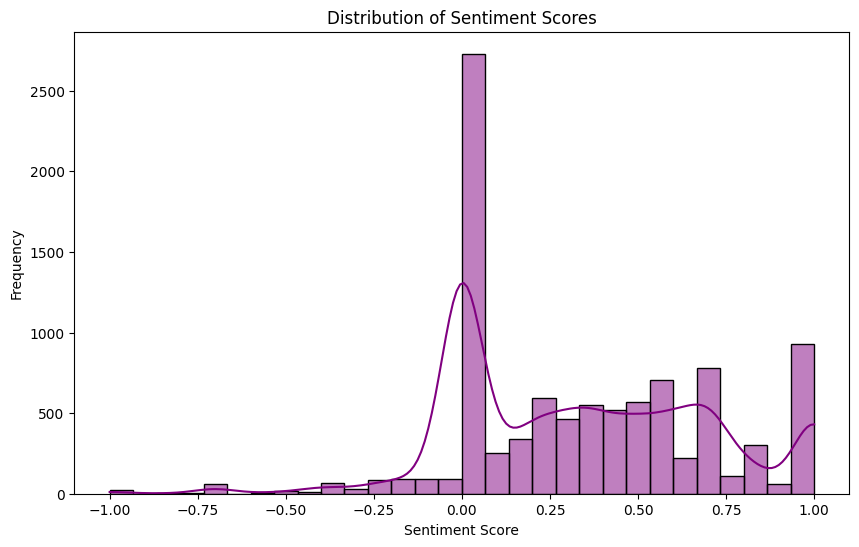

In [804]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

positive    6562
neutral     2571
negative     580
Name: sentiment_category, dtype: int64


/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_12287/3075349257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=data, palette='viridis')


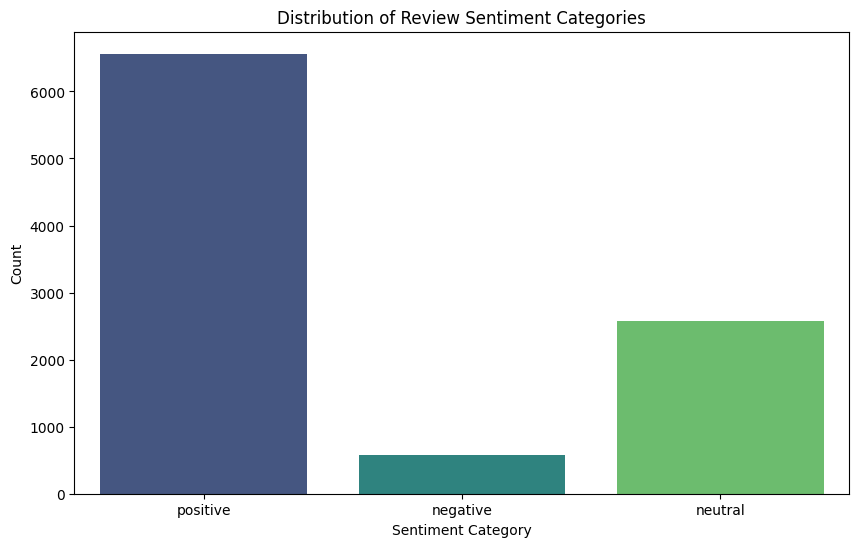

In [805]:
# Sentiment category counts
print(data['sentiment_category'].value_counts())

# Plot the sentiment category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', data=data, palette='viridis')
plt.title('Distribution of Review Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_12287/2953363026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ratings', y='sentiment_score', data=data, palette='coolwarm')


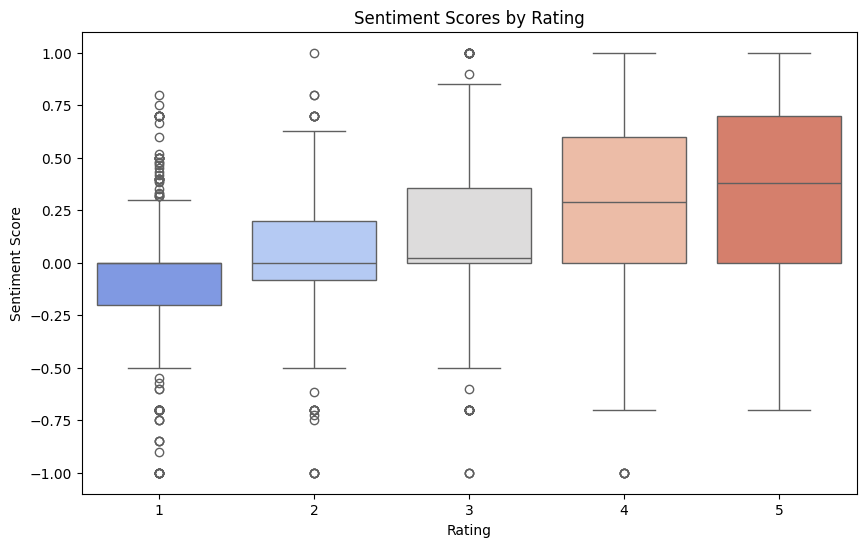

In [806]:
# Analyze sentiment by rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings', y='sentiment_score', data=data, palette='coolwarm')
plt.title('Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()

In [807]:
# Define a function to remove outliers using IQR method
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)].dropna()

# Remove outliers from the dataset
dat = remove_outliers_iqr(data)

# Display the cleaned dataset
print("Cleaned Data:")
print(data)

Cleaned Data:
      Ratings            Comment  \
0           5             Super!   
1           5          Must buy!   
2           5      Great product   
3           5     Simply awesome   
4           5     Classy product   
...       ...                ...   
9708        5  Terrific purchase   
9709        5     Classy product   
9710        5            Awesome   
9711        5             Super!   
9712        5  Terrific purchase   

                                                Reviews  review_length    neg  \
0     great camera pic videos battery life good far ...            506  0.000   
1     great device let tell superb build quality gre...            270  0.000   
2     love old size i.e inch type definitely go noth...            148  0.235   
3     iphone se best phone ever get beautifully desi...            503  0.087   
4     second iphone iphone i’ve long time android us...            507  0.076   
...                                                 ...            

/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_12287/1768458852.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_12287/1768458852.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
/var/folders/dt/ty2ltnkd5bl9j772y8m9kqp00000gn/T/ipykernel_12287/1768458852.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return data[(data >= lower_bound) & (da

In [808]:
data.isnull().sum()

Ratings                0
Comment                0
Reviews                0
review_length          0
neg                    0
neu                    0
pos                    0
compound               0
cleaned_review_text    0
sentiment_score        0
sentiment_category     0
dtype: int64

In [809]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample text
text = "I love this product! It's amazing."

# Create a VADER SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Get the sentiment scores
scores = analyzer.polarity_scores(text)

print(scores)

{'neg': 0.0, 'neu': 0.325, 'pos': 0.675, 'compound': 0.8516}


In [810]:
from sklearn.preprocessing import LabelEncoder

In [811]:
Encoder = LabelEncoder()
data["sentiment"] = Encoder.fit_transform(data["sentiment_category"])

In [812]:
data["sentiment"].value_counts()

2    6562
1    2571
0     580
Name: sentiment, dtype: int64

In [813]:
from sklearn.feature_extraction.text import TfidfVectorizer
TF_IDF = TfidfVectorizer(max_features = 2000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(data["Reviews"])

# Check our matrix shape
X.shape

(9713, 2000)

In [814]:
# Declaring our target variable
y = data["sentiment"]

In [815]:
from collections import Counter
Counter(y)

Counter({2: 6562, 1: 2571, 0: 580})

In [816]:
from imblearn.over_sampling import SMOTE

In [817]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [818]:
data.head()

,Ratings,Comment,Reviews,review_length,neg,neu,pos,compound,cleaned_review_text,sentiment_score,sentiment_category,sentiment
0,5,Super!,great camera pic videos battery life good far ...,506,0.000,0.765,0.235,0.9246,great camera pic videos battery life good far ...,0.266667,positive,2
1,5,Must buy!,great device let tell superb build quality gre...,270,0.000,0.388,0.612,0.9868,great device let tell superb build quality gre...,0.710000,positive,2
2,5,Great product,love old size i.e inch type definitely go noth...,148,0.235,0.453,0.312,0.4055,love old size i.e inch type definitely go noth...,0.400000,positive,2
3,5,Simply awesome,iphone se best phone ever get beautifully desi...,503,0.087,0.510,0.403,0.9686,iphone se best phone ever get beautifully desi...,0.303333,positive,2
4,5,Classy product,second iphone iphone i’ve long time android us...,507,0.076,0.655,0.269,0.9041,second iphone iphone i’ve long time android us...,0.278571,positive,2


# Create the train and test sets

In [819]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 42)

In [820]:
X_train.shape

(15748, 2000)

In [821]:
X_test.shape

(3938, 2000)

In [822]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

# 1. Naive Bayes Classifier

In [823]:
# Training the Naive Bayes classifier
model_1 = BernoulliNB()
model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1328
           1       0.64      0.95      0.76      1295
           2       0.94      0.68      0.79      1315

    accuracy                           0.78      3938
   macro avg       0.82      0.78      0.78      3938
weighted avg       0.82      0.78      0.78      3938



In [824]:
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [825]:
model_1_mse = mean_squared_error(y_test, y_pred_1)
model_1_rmse = np.sqrt(model_1_mse)
model_1_r2 = r2_score(y_test, y_pred_1)

In [826]:
print("Mean Squared Error:", model_1_mse)
print("Root Mean Squared Error:", model_1_rmse)
print("R-squared:", model_1_r2)

Mean Squared Error: 0.31081767394616555
Root Mean Squared Error: 0.5575102455974827
R-squared: 0.5368823780633389


In [827]:
def get_metrics(y_true, y_preds, pred_proba=None):
    print(f'Accuracy Score: {accuracy_score(y_true, y_preds)}')
    if pred_proba is not None:
        print(f'ROC AUC Score: {roc_auc_score(y_true, pred_proba, multi_class="ovo")}')
    print(classification_report(y_true, y_preds))
    plt.figure(figsize=(18,6))
    sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)

Accuracy Score: 0.7835280670561341
ROC AUC Score: 0.9183707273900352
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      5234
           1       0.64      0.96      0.77      5267
           2       0.95      0.67      0.78      5247

    accuracy                           0.78     15748
   macro avg       0.83      0.78      0.79     15748
weighted avg       0.83      0.78      0.79     15748



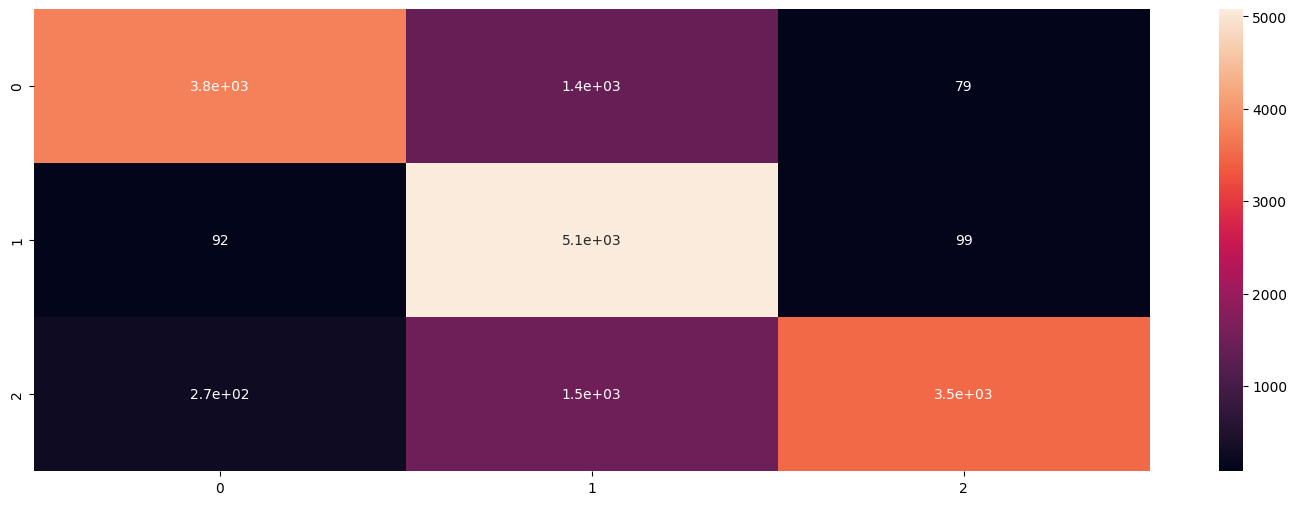

In [828]:
get_metrics(y_train, model_1.predict(X_train), model_1.predict_proba(X_train))

In [829]:
ConfusionMatrix_1 = confusion_matrix(y_test, y_pred_1)
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


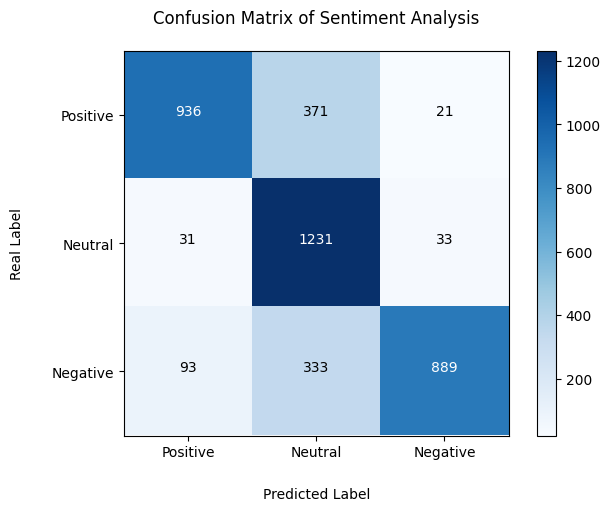

In [830]:
plot_cm(ConfusionMatrix_1, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

# 2. XGBoost Classifier

In [831]:
# Training the XGBoost classifier
import xgboost as xgb

model_2 = xgb.XGBClassifier(random_state=0)
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1328
           1       0.63      0.96      0.76      1295
           2       0.90      0.65      0.75      1315

    accuracy                           0.76      3938
   macro avg       0.81      0.76      0.76      3938
weighted avg       0.81      0.76      0.76      3938



In [832]:
model_2_mse = mean_squared_error(y_test, y_pred_2)
model_2_rmse = np.sqrt(model_2_mse)
model_2_r2 = r2_score(y_test, y_pred_2)

In [833]:
print("Mean Squared Error:", model_2_mse)
print("Root Mean Squared Error:", model_2_rmse)
print("R-squared:", model_2_r2)

Mean Squared Error: 0.34560690705942104
Root Mean Squared Error: 0.5878834128119461
R-squared: 0.4850465004446114


Accuracy Score: 0.8042926085852171
ROC AUC Score: 0.9183515976801907
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      5234
           1       0.66      0.99      0.79      5267
           2       0.95      0.68      0.79      5247

    accuracy                           0.80     15748
   macro avg       0.85      0.80      0.81     15748
weighted avg       0.85      0.80      0.81     15748



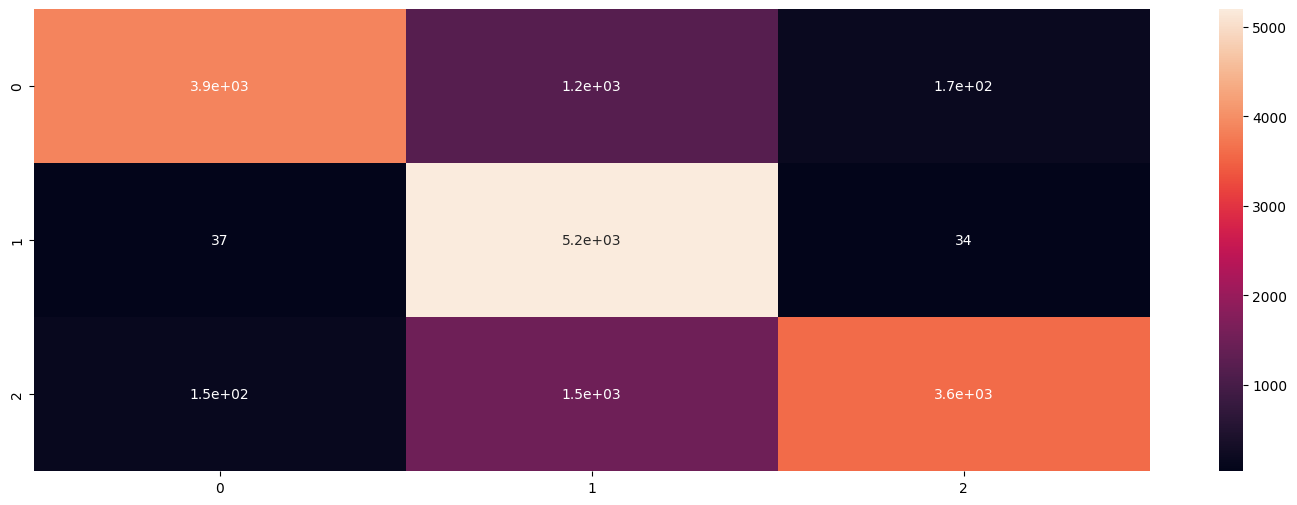

In [834]:
get_metrics(y_train, model_2.predict(X_train), model_2.predict_proba(X_train))

In [835]:
ConfusionMatrix_2 = confusion_matrix(y_test, y_pred_2)
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


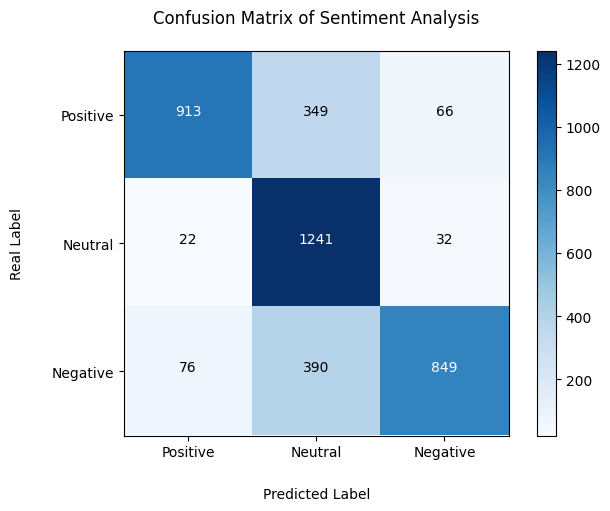

In [836]:
plot_cm(ConfusionMatrix_2, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

# 3. Decision Tree Classifier

In [837]:
# Training the Decision Tree classifier

model_3 = DecisionTreeClassifier(random_state=0)
model_3.fit(X_train, y_train)

y_pred_3 = model_3.predict(X_test)
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1328
           1       0.71      0.94      0.81      1295
           2       0.93      0.75      0.83      1315

    accuracy                           0.82      3938
   macro avg       0.84      0.82      0.82      3938
weighted avg       0.84      0.82      0.82      3938



In [838]:
# Evaluate model performance
model_3_mse = mean_squared_error(y_test, y_pred_3)
model_3_rmse = np.sqrt(model_3_mse)
model_3_r2 = r2_score(y_test, y_pred_3)

In [839]:
print("Mean Squared Error:", model_3_mse)
print("Root Mean Squared Error:", model_3_rmse)
print("R-squared:", model_3_r2)

Mean Squared Error: 0.2709497206703911
Root Mean Squared Error: 0.5205283091921045
R-squared: 0.5962855370862603


Accuracy Score: 0.9064008128016257
ROC AUC Score: 0.9687297188822627
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      5234
           1       0.78      1.00      0.88      5267
           2       1.00      0.89      0.94      5247

    accuracy                           0.91     15748
   macro avg       0.93      0.91      0.91     15748
weighted avg       0.93      0.91      0.91     15748



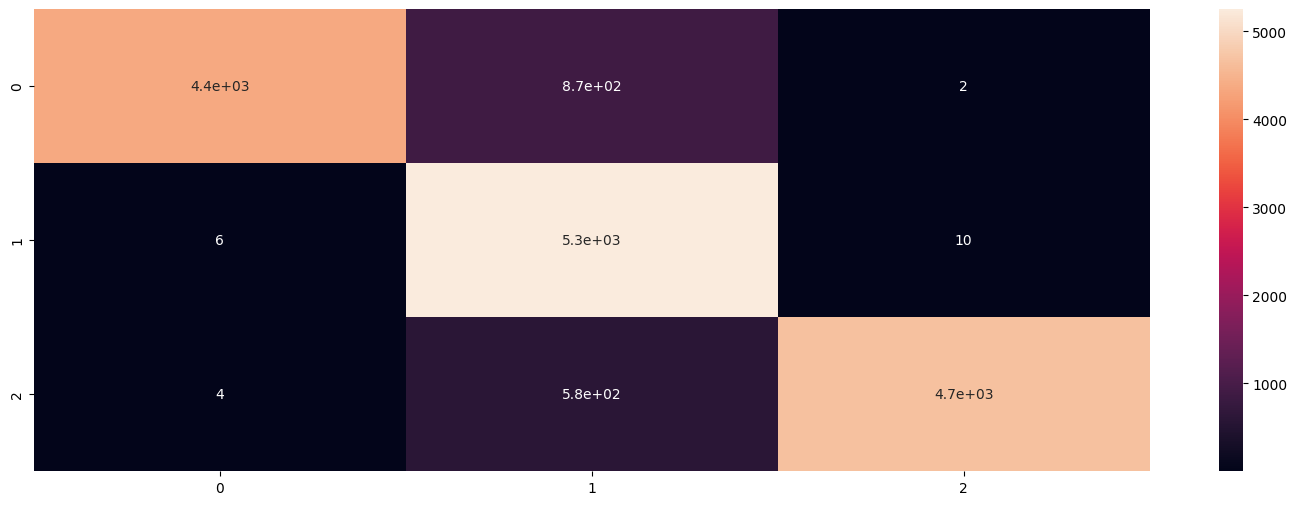

In [840]:
get_metrics(y_train, model_3.predict(X_train), model_3.predict_proba(X_train))

# 4. Logistic Regression Classifier

In [841]:
# Training the Logistic Regression classifier

model_4 = LogisticRegression(random_state=0)
model_4.fit(X_train, y_train)

y_pred_4 = model_4.predict(X_test)
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1328
           1       0.67      0.92      0.77      1295
           2       0.93      0.78      0.85      1315

    accuracy                           0.79      3938
   macro avg       0.82      0.79      0.79      3938
weighted avg       0.82      0.79      0.79      3938



In [842]:
# Evaluate model performance
model_4_mse = mean_squared_error(y_test, y_pred_4)
model_4_rmse = np.sqrt(model_4_mse)
model_4_r2 = r2_score(y_test, y_pred_4)

In [843]:
print("Mean Squared Error:", model_4_mse)
print("Root Mean Squared Error:", model_4_rmse)
print("R-squared:", model_4_r2)

Mean Squared Error: 0.3026917216861351
Root Mean Squared Error: 0.5501742648344569
R-squared: 0.5489900283100491


Accuracy Score: 0.8225806451612904
ROC AUC Score: 0.9371635268833064
              precision    recall  f1-score   support

           0       0.92      0.69      0.78      5234
           1       0.69      0.95      0.80      5267
           2       0.96      0.83      0.89      5247

    accuracy                           0.82     15748
   macro avg       0.85      0.82      0.82     15748
weighted avg       0.85      0.82      0.82     15748



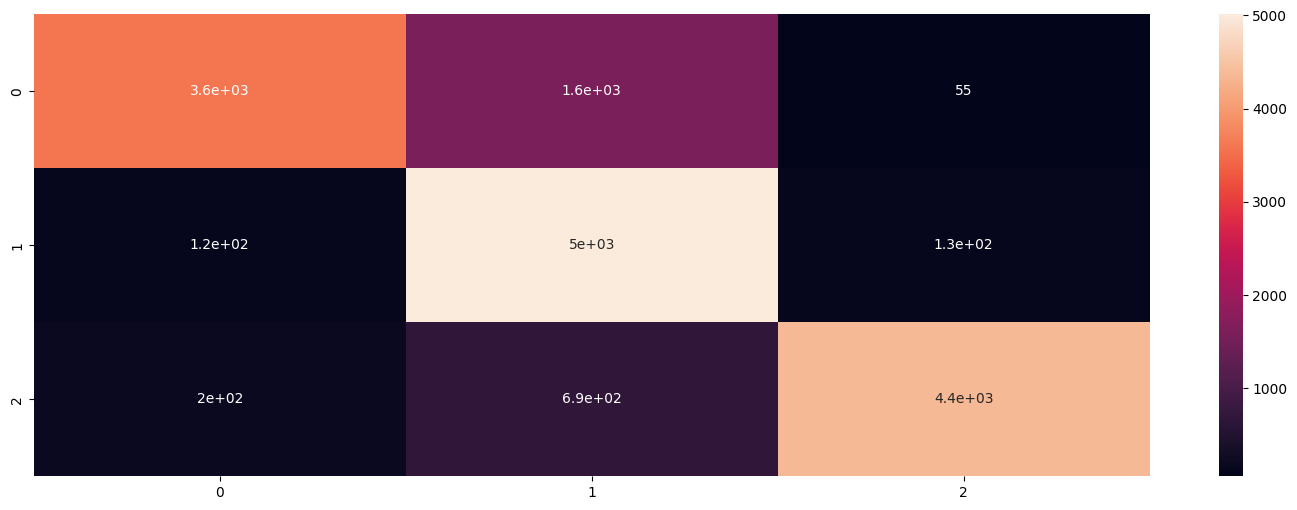

In [844]:
get_metrics(y_train, model_4.predict(X_train), model_4.predict_proba(X_train))

# 5. Random Forest Classifier

In [845]:
# Training the Random Forest classifier

model_5 = RandomForestClassifier(n_estimators=100)
model_5.fit(X_train, y_train)

y_pred_5 = model_5.predict(X_test)
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1328
           1       0.72      0.95      0.82      1295
           2       0.96      0.74      0.83      1315

    accuracy                           0.83      3938
   macro avg       0.85      0.83      0.83      3938
weighted avg       0.85      0.83      0.83      3938



In [846]:
# Evaluate model performance
model_5_mse = mean_squared_error(y_test, y_pred_5)
model_5_rmse = np.sqrt(model_5_mse)
model_5_r2 = r2_score(y_test, y_pred_5)

In [847]:
print("Mean Squared Error:", model_5_mse)
print("Root Mean Squared Error:", model_5_rmse)
print("R-squared:", model_5_r2)

Mean Squared Error: 0.25774504824784156
Root Mean Squared Error: 0.507685974050733
R-squared: 0.6159604687371643


Accuracy Score: 0.9064008128016257
ROC AUC Score: 0.9649962329975145
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      5234
           1       0.78      1.00      0.88      5267
           2       1.00      0.89      0.94      5247

    accuracy                           0.91     15748
   macro avg       0.93      0.91      0.91     15748
weighted avg       0.93      0.91      0.91     15748



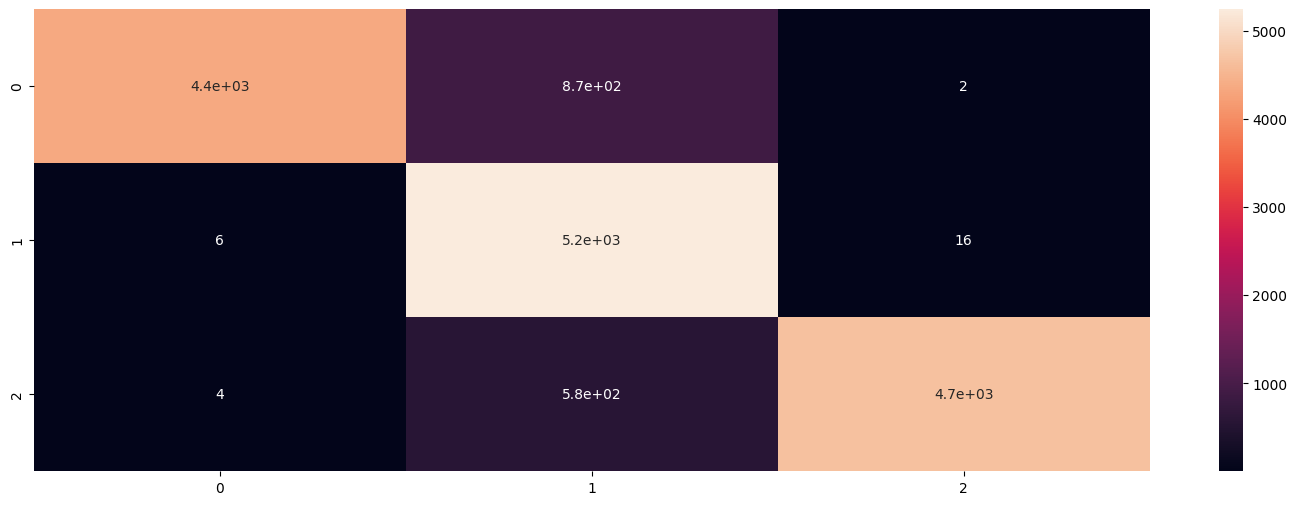

In [848]:
get_metrics(y_train, model_5.predict(X_train), model_5.predict_proba(X_train))

# 6. K-Nearest Neighbour Classifier

In [849]:
# Training the K-Nearest Neighbour classifier

model_6 = KNeighborsClassifier()
model_6.fit(X_train, y_train)

y_pred_6 = model_6.predict(X_test)
print(classification_report(y_test, y_pred_6))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      1328
           1       0.65      0.91      0.76      1295
           2       0.94      0.28      0.44      1315

    accuracy                           0.65      3938
   macro avg       0.73      0.66      0.62      3938
weighted avg       0.73      0.65      0.62      3938



In [850]:
# Evaluate model performance
model_6_mse = mean_squared_error(y_test, y_pred_6)
model_6_rmse = np.sqrt(model_6_mse)
model_6_r2 = r2_score(y_test, y_pred_6)

In [851]:
print("Mean Squared Error:", model_6_mse)
print("Root Mean Squared Error:", model_6_rmse)
print("R-squared:", model_6_r2)

Mean Squared Error: 0.8087861858811579
Root Mean Squared Error: 0.8993254060022756
R-squared: -0.2050895636178638


Accuracy Score: 0.6965963931927864
ROC AUC Score: 0.9062870436517549
              precision    recall  f1-score   support

           0       0.63      0.80      0.71      5234
           1       0.69      0.94      0.79      5267
           2       0.96      0.34      0.51      5247

    accuracy                           0.70     15748
   macro avg       0.76      0.70      0.67     15748
weighted avg       0.76      0.70      0.67     15748



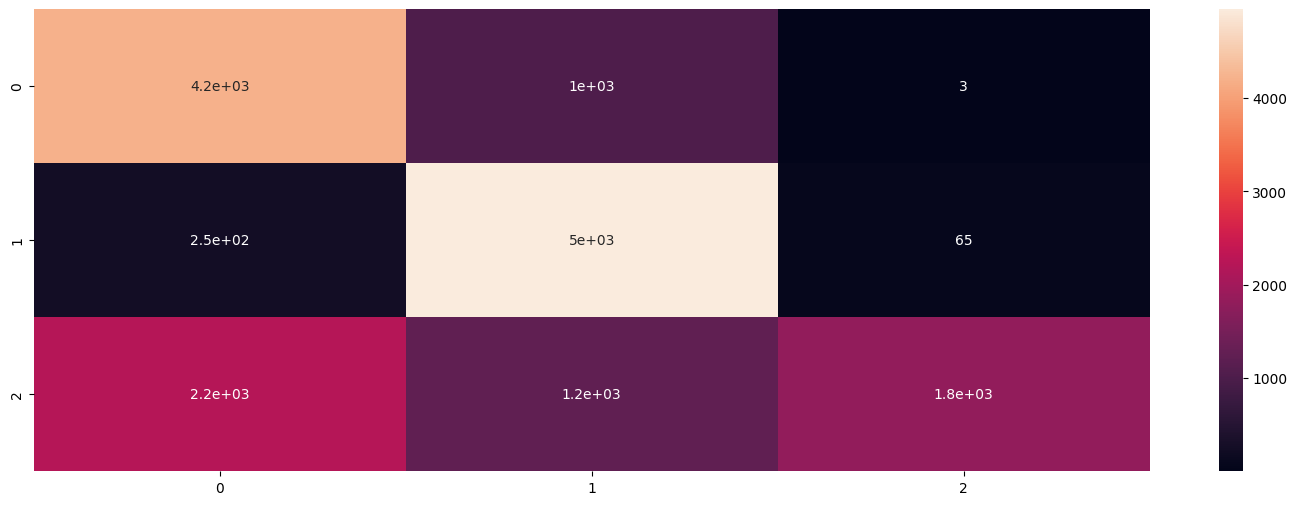

In [852]:
get_metrics(y_train, model_6.predict(X_train), model_6.predict_proba(X_train))

# 7. Support Vector Regression (SVR) Classifier

In [853]:
# Training the Support Vector Regression (SVR) classifier

model_7 = SVC(kernel = 'rbf')
model_7.fit(X_train, y_train)

y_pred_7 = model_7.predict(X_test)
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83      1328
           1       0.70      0.94      0.80      1295
           2       0.94      0.89      0.91      1315

    accuracy                           0.85      3938
   macro avg       0.87      0.85      0.85      3938
weighted avg       0.87      0.85      0.85      3938



In [854]:
# Evaluate model performance
model_7_mse = mean_squared_error(y_test, y_pred_7)
model_7_rmse = np.sqrt(model_7_mse)
model_7_r2 = r2_score(y_test, y_pred_7)

In [855]:
print("Mean Squared Error:", model_7_mse)
print("Root Mean Squared Error:", model_7_rmse)
print("R-squared:", model_7_r2)

Mean Squared Error: 0.16353478923311326
Root Mean Squared Error: 0.40439434866614205
R-squared: 0.7563335387849595


Accuracy Score: 0.8639827279654559
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      5234
           1       0.72      0.98      0.83      5267
           2       0.99      0.89      0.94      5247

    accuracy                           0.86     15748
   macro avg       0.90      0.86      0.87     15748
weighted avg       0.90      0.86      0.87     15748



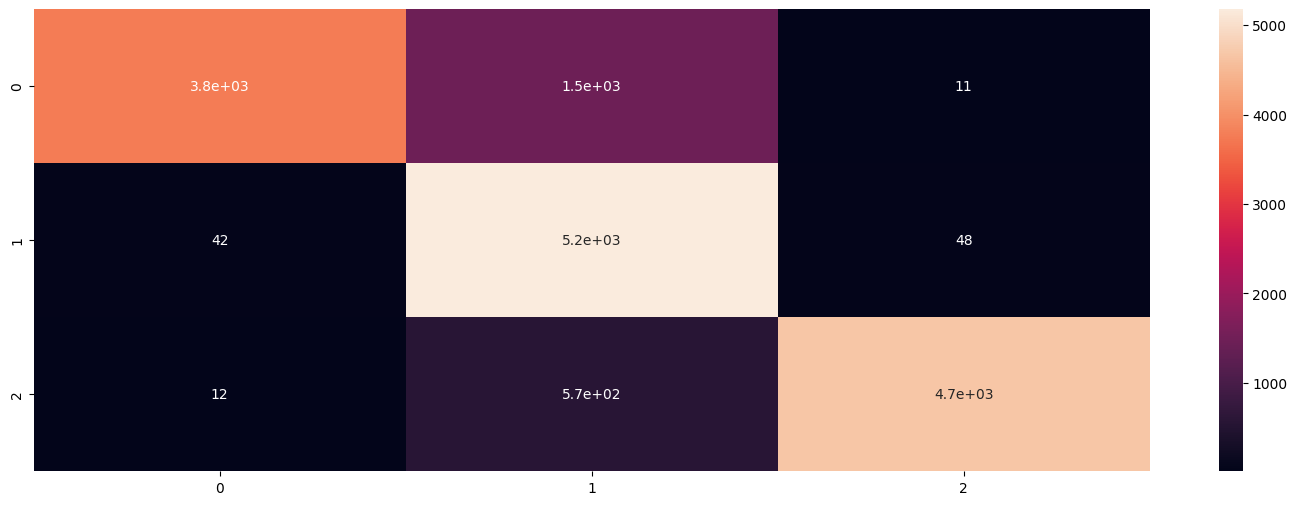

In [856]:
get_metrics(y_train, model_7.predict(X_train))

In [857]:
table=pd.DataFrame({'Name of Model':['Naive Bayes Classifier','XGBoost Classifier','Decision Tree Classifier','Logistic Regression Classifier','Random Forest Classifier','KNN Classifier','SVR Classifier'],'Prep_Models':['model_1','model_2','model_3','model_4','model_5','model_6','model_7'],'Rsquared':[model_1_r2,model_2_r2,model_3_r2,model_4_r2,model_5_r2,model_6_r2,model_7_r2]})
table

,Name of Model,Prep_Models,Rsquared
0,Naive Bayes Classifier,model_1,0.536882
1,XGBoost Classifier,model_2,0.485047
2,Decision Tree Classifier,model_3,0.596286
3,Logistic Regression Classifier,model_4,0.548990
4,Random Forest Classifier,model_5,0.615960
5,KNN Classifier,model_6,-0.205090
6,SVR Classifier,model_7,0.756334


In [858]:
import pickle
pickle.dump(model_7,open('SVR.pkl','wb'))
pickle.dump(TF_IDF,open('tfidf_vectorizer.pkl', 'wb'))

In [879]:
content = 'bad product'


In [880]:
load_1 = open('tfidf_vectorizer.pkl','rb')
model = joblib.load(load_1)

load = open('SVR.pkl','rb')
model = pickle.load(load)

In [881]:
X = TF_IDF.transform([content])
result = model.predict(X)[0]

In [882]:
print(result)

0
